In [2]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 6
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

Set the matrix and check the matrix multiplications set correctly. 

In [4]:
G = np.array([[3/4, 1/2],[1/2, 1]])
G2 = np.array([[2, -1],[-1, 3/2]])

In [76]:
W = np.linalg.inv(G)
W2 = np.linalg.inv(G2)

In [7]:
ax , ay = np.dot(W, [x, y])
ax2 , ay2 = np.dot(W2, [x, y])

In [10]:
zx, zy  = -np.tanh(ax), -np.tanh(ay)
zx2, zy2  = -np.tanh(ax2), -np.tanh(ay2)

In [11]:
px, py = 1/np.cosh(ax), 1/np.cosh(ay)
px2, py2 = 1/np.cosh(ax2), 1/np.cosh(ay2)

from given datapoints (x, y), find the target density distribution 

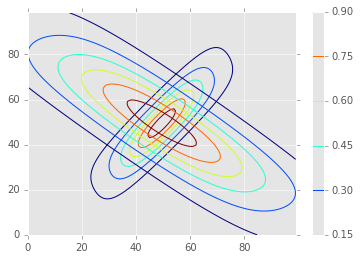

In [162]:

N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z , Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=1/np.cosh(np.dot(W, [X[i,j], Y[i,j]]))[0]*1/np.cosh(np.dot(W, [X[i,j], Y[i,j]]))[1]
for i in range(N):
    for j in range(N):
         Z2[i,j]=1/np.cosh(np.dot(W2, [X[i,j], Y[i,j]]))[0]*1/np.cosh(np.dot(W2, [X[i,j], Y[i,j]]))[1]        
plt.contour(Z)
plt.contour(Z2)
plt.colorbar()
plt.show()

In [109]:
# center at origin, and 1 at center. 

def Cauchy(x):
    return 3.14141/(1+np.pi**2*x**2)

In [111]:
Cauchy(0)

3.141410

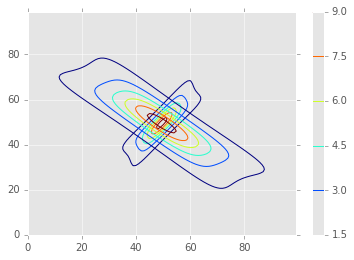

In [161]:

N = 100
x, y = np.linspace(-2,2, N), np.linspace(-2,2, N)
X, Y = np.meshgrid(x, y)
Z, Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[1]
        
for i in range(N):
    for j in range(N):
         Z2[i,j]=Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[1]
        
plt.contour(Z)
plt.contour(Z2)
plt.colorbar()
plt.show()


In [129]:
Z.min(), Z.max()

(0.000000, 9.123957)

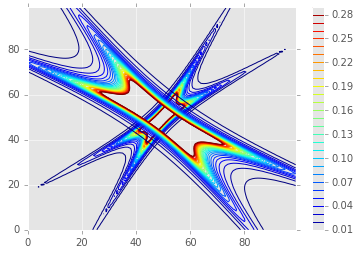

In [145]:

N = 100
x, y = np.linspace(-8,8, N), np.linspace(-8,8, N)
X, Y = np.meshgrid(x, y)
Z, Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W, [X[i,j], Y[i,j]]))[1]
        
for i in range(N):
    for j in range(N):
         Z2[i,j]=Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[0]*Cauchy(np.dot(W2, [X[i,j], Y[i,j]]))[1]

contour_levels = np.arange(0.01, 0.3, 0.01)
plt.contour(Z, contour_levels )
plt.contour(Z2, contour_levels )
plt.colorbar()



learning algorithm 

In [150]:
dW = np.linalg.inv(np.transpose(W))+np.dot([-np.tanh(np.dot(WN, [x, y]))], np.transpose([x,y]))

In [199]:
epsilon = 0.001
WN= W+epsilon *dW[0]

In [200]:
W

array([[ 2. , -1. ],
       [-1. ,  1.5]])

In [201]:
WN

array([[ 1.61716 , -1.38309 ],
       [-1.333474,  1.167026]])

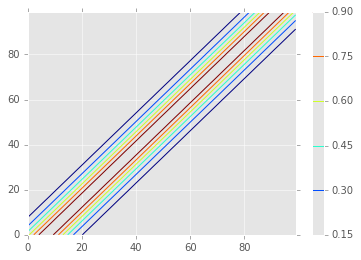

In [202]:

N = 100
x, y = np.linspace(-4,4, N), np.linspace(-4,4, N)
X, Y = np.meshgrid(x, y)
Z , Z2 = np.zeros((N,N)), np.zeros((N,N))
for i in range(N):
    for j in range(N):
         Z[i,j]=1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[0]*1/np.cosh(np.dot(WN, [X[i,j], Y[i,j]]))[1]
        
plt.contour(Z)
#plt.contour(Z2)
plt.colorbar()
plt.show()